# Clustering: Vortex patch features

Synthesize small 2D velocity patches with different vortex strengths, extract simple features (mean speed, kinetic energy, vorticity),
cluster them with KMeans, and visualize clusters and representative patches.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.rcParams['figure.figsize'] = (8, 5)

In [2]:
def make_vortex_patch(strength, size=16):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    u = -strength * Y
    v = strength * X
    return u, v

def extract_features(u, v):
    speed = np.sqrt(u**2 + v**2)
    mean_speed = np.mean(speed)
    ke = 0.5 * np.mean(speed**2)
    dvdx = np.gradient(v, axis=1)
    dudy = np.gradient(u, axis=0)
    vorticity = np.mean(dvdx - dudy)
    return [mean_speed, ke, vorticity]

rng = np.random.RandomState(3)
n = 240
strengths = rng.choice([0.5, 1.5, 3.0, 5.0], size=n)
features = []
patches = []
for s in strengths:
    u, v = make_vortex_patch(s)
    patches.append((u, v))
    features.append(extract_features(u, v))
Xf = np.array(features)

In [3]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Xf)
labels = kmeans.labels_
score = silhouette_score(Xf, labels)
print(f'Silhouette score: {score:.3f}')

Silhouette score: 1.000


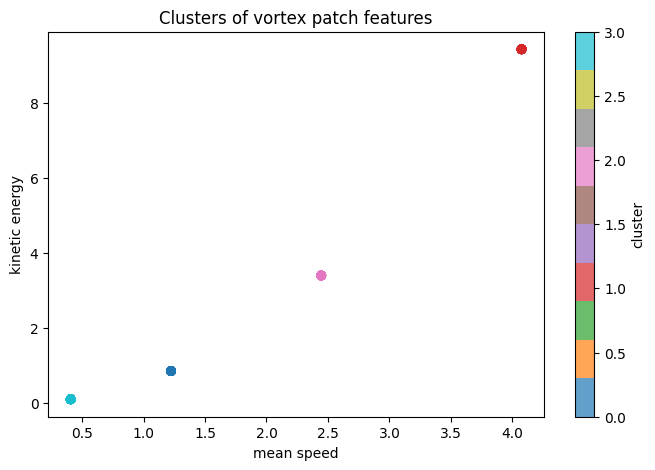

In [4]:
# scatter of features colored by cluster
plt.scatter(Xf[:, 0], Xf[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.xlabel('mean speed')
plt.ylabel('kinetic energy')
plt.title('Clusters of vortex patch features')
plt.colorbar(label='cluster')
plt.show()

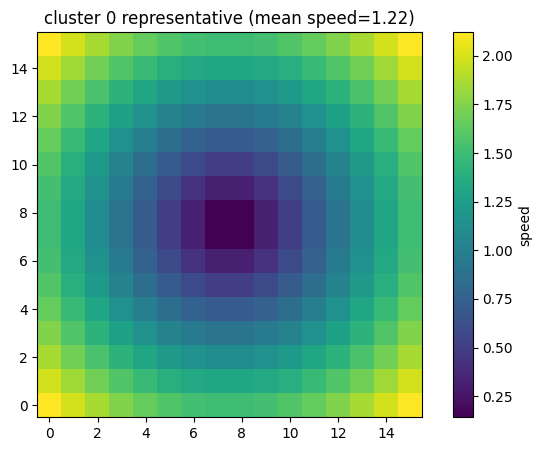

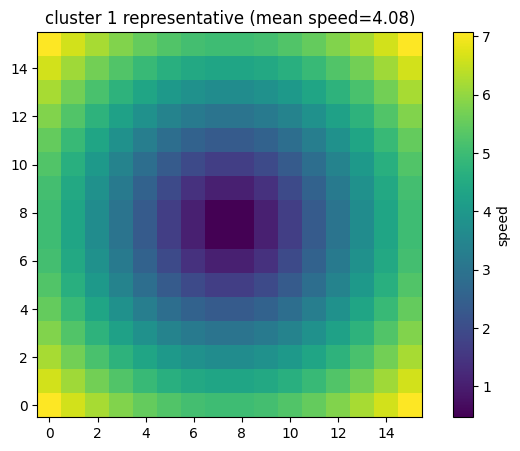

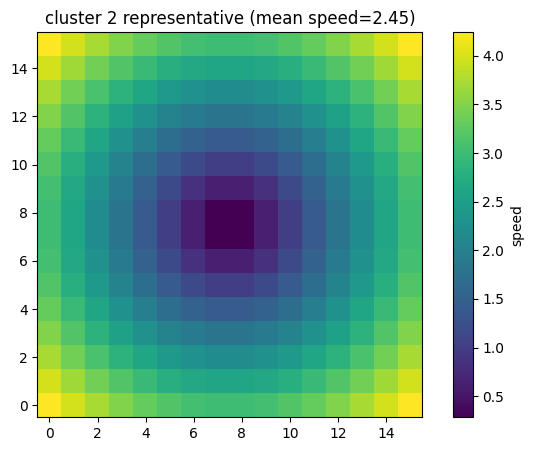

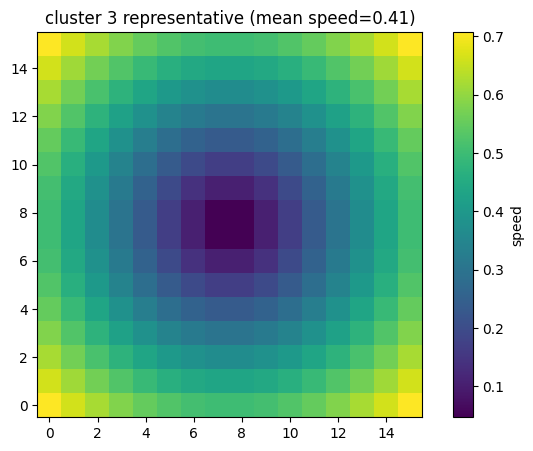

In [5]:
# show a few representative patches from each cluster
for c in np.unique(labels):
    idx = np.where(labels == c)[0][0]
    u, v = patches[idx]
    speed = np.sqrt(u**2 + v**2)
    plt.figure()
    plt.imshow(speed, origin='lower')
    plt.title(f'cluster {c} representative (mean speed={Xf[idx,0]:.2f})')
    plt.colorbar(label='speed')
    plt.show()